## My Goal

* Import Data
* Take The Label from the data
* Take the image name from the data
* visualize random images
* turn to images to numpy array and enlarge the data
* build the model
* visualize the result of model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mias-mammography/Info.txt
/kaggle/input/mias-mammography/all_mias_scans.h5
/kaggle/input/mias-mammography/all-mias.tar.gz
/kaggle/input/mias-mammography/all-mias/mdb152.pgm
/kaggle/input/mias-mammography/all-mias/mdb088.pgm
/kaggle/input/mias-mammography/all-mias/mdb113.pgm
/kaggle/input/mias-mammography/all-mias/mdb182.pgm
/kaggle/input/mias-mammography/all-mias/mdb239.pgm
/kaggle/input/mias-mammography/all-mias/mdb066.pgm
/kaggle/input/mias-mammography/all-mias/mdb220.pgm
/kaggle/input/mias-mammography/all-mias/mdb292.pgm
/kaggle/input/mias-mammography/all-mias/mdb286.pgm
/kaggle/input/mias-mammography/all-mias/mdb103.pgm
/kaggle/input/mias-mammography/all-mias/mdb194.pgm
/kaggle/input/mias-mammography/all-mias/mdb275.pgm
/kaggle/input/mias-mammography/all-mias/mdb060.pgm
/kaggle/input/mias-mammography/all-mias/mdb067.pgm
/kaggle/input/mias-mammography/all-mias/mdb023.pgm
/kaggle/input/mias-mammography/all-mias/mdb073.pgm
/kaggle/input/mias-mammography/all-mias/mdb307.p

In [2]:
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random # for visualization
print('Libraries Imported')

Libraries Imported


In [3]:
path = '../input/mias-mammography/all-mias/'

an example of image path

../input/mias-mammography/all-mias/mdb001.pgm

## Read Data

In [4]:
print("reading dataframe")
info=pd.read_csv("../input/mias-mammography/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [5]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [6]:
# taking the images filenames in to dictionary
ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]

In [7]:
#ids

## Turning our outputs B-M to 1-0

In [8]:
# Turning our outputs B-M to 1-0
label = []
for i in info.SEVERITY:
    if i =='B':
        label.append(1)
    else:
        label.append(0)

In [9]:
label = np.array(label)

In [10]:
label.shape

(330,)

In [11]:
# define the every images filepaths in to list
img_name = []

for i in range(123):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [12]:
img_name = np.array(img_name)

In [13]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (123,)


In [14]:
del info

## view image random images

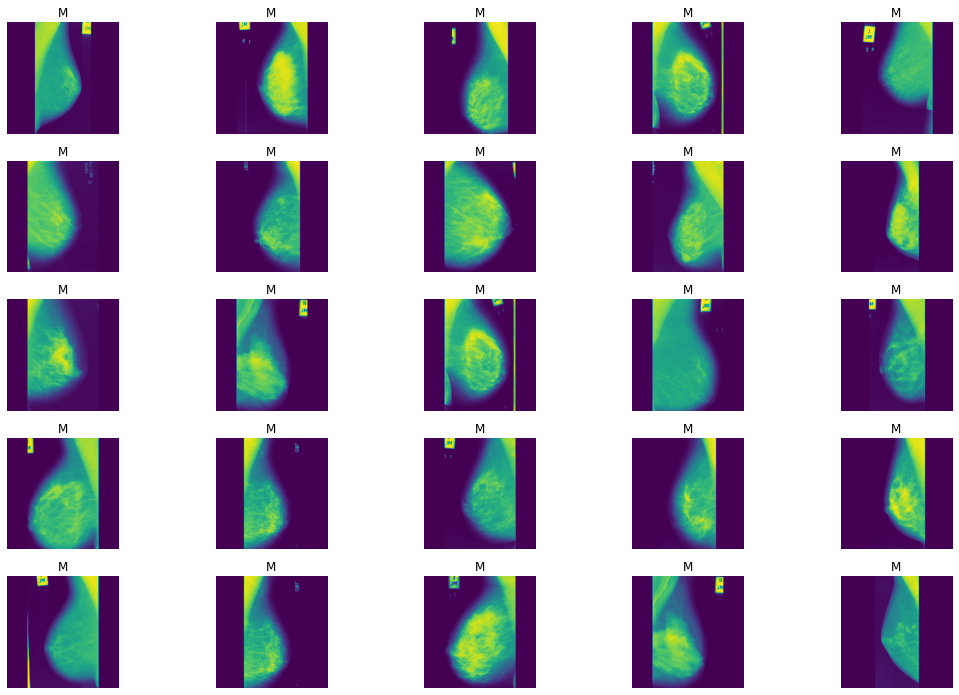

In [15]:
# view image random images
def view_25_random_image():
    plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,122)
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[i] == '1':
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)

random_images = view_25_random_image()

## read Images and labels. and augmentation of images

In [16]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [17]:
last_label = np.array(last_label)
last_label.shape

(44280,)

## split train and test set

In [18]:
# splin train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [19]:
len(x_train),len(x_test),len(y_train),len(y_test)

(35424, 8856, 35424, 8856)

In [20]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [21]:
x_train.shape

(35424, 224, 224)

In [22]:
x_test.shape

(8856, 224, 224)

In [23]:
(a,b,c)=x_train.shape # (35424, 224, 224)
x_train = np.reshape(x_train, (a, b, c, 1)) # 1 for gray scale
(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))

## Build a Model

In [24]:

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # full connect   
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [25]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 54, 54, 64)        4

## Define Callbacks

In [26]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=100,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])



Epoch 1/100
443/443 [==============================] - 57s 119ms/step - loss: 2.8389 - accuracy: 0.7510 - val_loss: 0.4690 - val_accuracy: 0.7905

Epoch 00001: val_loss improved from inf to 0.46904, saving model to ./
Epoch 2/100
443/443 [==============================] - 51s 115ms/step - loss: 0.4297 - accuracy: 0.8034 - val_loss: 0.3914 - val_accuracy: 0.8301

Epoch 00002: val_loss improved from 0.46904 to 0.39140, saving model to ./
Epoch 3/100
443/443 [==============================] - 51s 115ms/step - loss: 0.3129 - accuracy: 0.8582 - val_loss: 0.2651 - val_accuracy: 0.8762

Epoch 00003: val_loss improved from 0.39140 to 0.26508, saving model to ./
Epoch 4/100
443/443 [==============================] - 51s 115ms/step - loss: 0.2031 - accuracy: 0.9129 - val_loss: 0.1657 - val_accuracy: 0.9323

Epoch 00004: val_loss improved from 0.26508 to 0.16569, saving model to ./
Epoch 5/100
443/443 [==============================] - 53s 119ms/step - loss: 0.1387 - accuracy: 0.9432 - val_loss: 

the model looks overfitting. those may be the reason
* we don't have enough data
* We enlarge multiple images with the same image

In [28]:
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

277/277 [==============================] - 5s 18ms/step - loss: 0.0266 - accuracy: 0.9918
Test_loss_value = 0.026580974459648132
test_accuracy = 0.9917569756507874
[[6.2580233e-11]
 [1.1655384e-11]
 [2.8466803e-16]
 ...
 [2.4033914e-11]
 [1.1327635e-08]
 [9.3465552e-08]]


## Let's Visualize our result

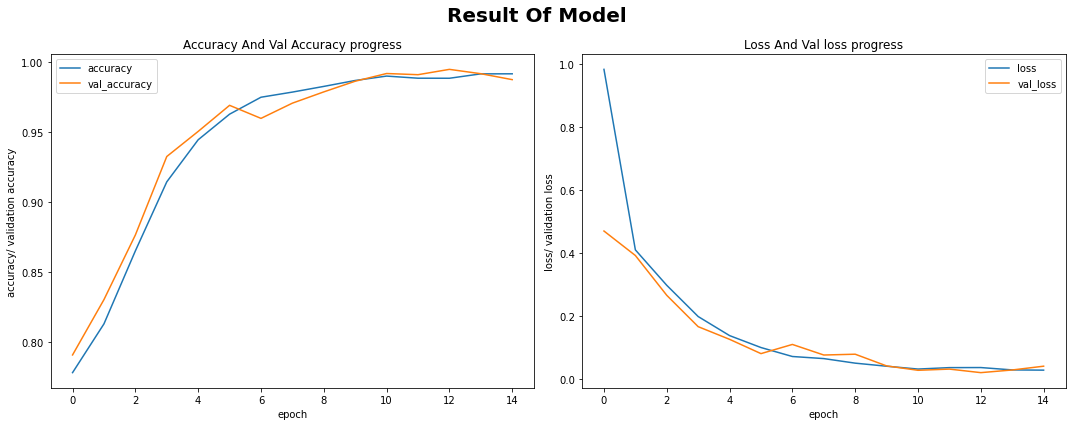

In [29]:

def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred.shape

(8856, 1)

In [32]:
y_pred

array([[6.2580233e-11],
       [1.1655384e-11],
       [2.8466803e-16],
       ...,
       [2.4033914e-11],
       [1.1327635e-08],
       [9.3465552e-08]], dtype=float32)